In [1]:
import numpy as np
import pandas as pd
df=pd.read_csv("Zoo.csv")
df.shape

(101, 18)

In [2]:
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [3]:
#Label Encoding the obj Dtypes
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
for column in df.select_dtypes(include=["object"]):
    df[column] = LE.fit_transform(df[column])
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [4]:
#choosing X and Y variables
y=df["type"]
x=df.iloc[:,0:17]
x.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


In [5]:
#standardization will fit the values b/w -3 to +3

from sklearn.preprocessing import StandardScaler
SS=StandardScaler()
SS_x = SS.fit_transform(x)
SS_x = pd.DataFrame(SS_x)
#giving columns names to the converted data
SS_x.columns = list(x)
SS_x.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,-1.708840,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353,1.138180
1,-1.674148,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,-1.115547,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180
2,-1.639456,-0.861034,-0.496904,0.843721,-0.826640,-0.558291,1.343710,0.896421,0.809776,0.46569,-1.951800,-0.293294,2.222876,-1.404435,0.588784,-0.384353,-0.878595
3,-1.604764,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353,1.138180
4,-1.570072,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180


In [6]:
#Data partition
#test_size = 0.30 (train:test = 70:30)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(SS_x,y,test_size=0.30)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(70, 17)
(31, 17)
(70,)
(31,)


In [7]:
#KNN APPORACH #assuming k=5
#fitting model
from sklearn.metrics import accuracy_score
for i in range(1,21,2):
  from sklearn.neighbors import KNeighborsClassifier
  KNN = KNeighborsClassifier(n_neighbors=i)
  #model fitting
  KNN.fit(x_train,y_train)
  y_pred_train = KNN.predict(x_train)
  y_pred_test = KNN.predict(x_test)
  ac1=accuracy_score(y_train,y_pred_train)
  ac2=accuracy_score(y_test,y_pred_test)
  print("Trainig accuracy for","k = ",i," ",ac1.round(3))
  print("Test accuracy for","k = ",i," ",ac2.round(3))
  print("Variance between Training and Testing :",(ac1-ac2).round(3))
  print(" ")



Trainig accuracy for k =  1   1.0
Test accuracy for k =  1   0.935
Variance between Training and Testing : 0.065
 
Trainig accuracy for k =  3   0.971
Test accuracy for k =  3   0.935
Variance between Training and Testing : 0.036
 
Trainig accuracy for k =  5   0.971
Test accuracy for k =  5   0.903
Variance between Training and Testing : 0.068
 
Trainig accuracy for k =  7   0.886
Test accuracy for k =  7   0.839
Variance between Training and Testing : 0.047
 
Trainig accuracy for k =  9   0.886
Test accuracy for k =  9   0.839
Variance between Training and Testing : 0.047
 
Trainig accuracy for k =  11   0.886
Test accuracy for k =  11   0.871
Variance between Training and Testing : 0.015
 
Trainig accuracy for k =  13   0.9
Test accuracy for k =  13   0.903
Variance between Training and Testing : -0.003
 
Trainig accuracy for k =  15   0.914
Test accuracy for k =  15   0.935
Variance between Training and Testing : -0.021
 
Trainig accuracy for k =  17   0.886
Test accuracy for k =  

In [8]:
#cross validation by KNN
#k=15
#cross validation method
#validation set approach
#random state = we wre not shuffling the data
#test_size = 0.30 (train:test = 70:30)
for i in range(1,21,2):
  from sklearn.model_selection import train_test_split
  from sklearn.neighbors import KNeighborsClassifier
  KNN = KNeighborsClassifier(n_neighbors=i)
  training_accuracy = []
  test_accuracy = []
  for p in range(1,101):
    x_train,x_test,y_train,y_test = train_test_split(SS_x,y,test_size=0.30,random_state=p)
    KNN.fit(x_train,y_train)
    y_pred_train = KNN.predict(x_train)
    y_pred_test = KNN.predict(x_test)
    training_accuracy.append(accuracy_score(y_train,y_pred_train))
    test_accuracy.append(accuracy_score(y_test,y_pred_test))
    ac1=np.mean(training_accuracy)
    ac2=np.mean(test_accuracy)
  print("Cross validation Trainig accuracy for ","k =",i,": ",np.mean(training_accuracy).round(2))
  print("Cross validation Test accuracy for ","k =",i,": ",np.mean(test_accuracy).round(2))
  print("Variance between Training and Testing :","for k=",i,":",(ac1-ac2).round(3))
  print(" ")

Cross validation Trainig accuracy for  k = 1 :  1.0
Cross validation Test accuracy for  k = 1 :  0.95
Variance between Training and Testing : for k= 1 : 0.046
 
Cross validation Trainig accuracy for  k = 3 :  0.97
Cross validation Test accuracy for  k = 3 :  0.92
Variance between Training and Testing : for k= 3 : 0.053
 
Cross validation Trainig accuracy for  k = 5 :  0.95
Cross validation Test accuracy for  k = 5 :  0.88
Variance between Training and Testing : for k= 5 : 0.067
 
Cross validation Trainig accuracy for  k = 7 :  0.92
Cross validation Test accuracy for  k = 7 :  0.85
Variance between Training and Testing : for k= 7 : 0.07
 
Cross validation Trainig accuracy for  k = 9 :  0.89
Cross validation Test accuracy for  k = 9 :  0.83
Variance between Training and Testing : for k= 9 : 0.059
 
Cross validation Trainig accuracy for  k = 11 :  0.88
Cross validation Test accuracy for  k = 11 :  0.83
Variance between Training and Testing : for k= 11 : 0.052
 
Cross validation Trainig ac

In [ ]:
#Hence for k=11, is the best fit for this model. we are getting low variance (0.052)

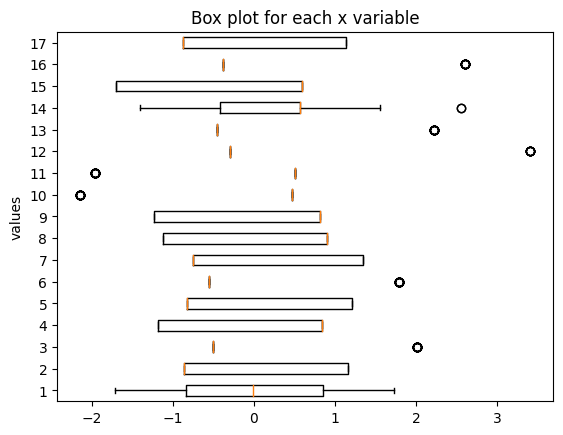

In [15]:
#-------------------Univariate analysis-----------------------------------------------
#constructing box for all x_variables value counts
#Visualizing the data
import matplotlib.pyplot as plt
plt.boxplot(SS_x,vert=False)
plt.title("Box plot for each x variable")
plt.ylabel("values")
plt.show()

array([[<Axes: title={'center': 'animal name'}>,
        <Axes: title={'center': 'hair'}>,
        <Axes: title={'center': 'feathers'}>,
        <Axes: title={'center': 'eggs'}>],
       [<Axes: title={'center': 'milk'}>,
        <Axes: title={'center': 'airborne'}>,
        <Axes: title={'center': 'aquatic'}>,
        <Axes: title={'center': 'predator'}>],
       [<Axes: title={'center': 'toothed'}>,
        <Axes: title={'center': 'backbone'}>,
        <Axes: title={'center': 'breathes'}>,
        <Axes: title={'center': 'venomous'}>],
       [<Axes: title={'center': 'fins'}>,
        <Axes: title={'center': 'legs'}>,
        <Axes: title={'center': 'tail'}>,
        <Axes: title={'center': 'domestic'}>],
       [<Axes: title={'center': 'catsize'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

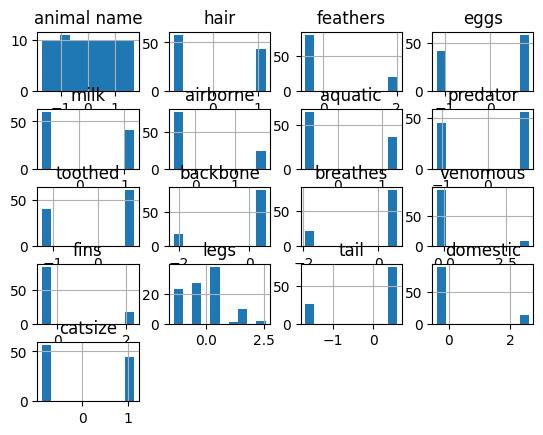

In [14]:
#-------------------Univariate analysis-----------------------------------------------
#constructing histogram for all x_variables value counts
SS_x.hist()

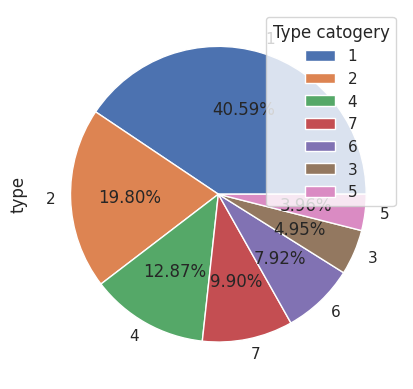

In [28]:
##-------------------Univariate analysis-----------------------------------------------
#constructing pie-chart for type variable value counts

import matplotlib.pyplot as plt
df['type'].value_counts().plot(kind='pie',autopct='%1.2f%%')
#autopct='%1.2f%%' ----> it gives what % of single catogery occupied on entire
plt.legend(title="Type catogery") #gives which color is for which one
plt.title("Pie chart for type")
plt.show()


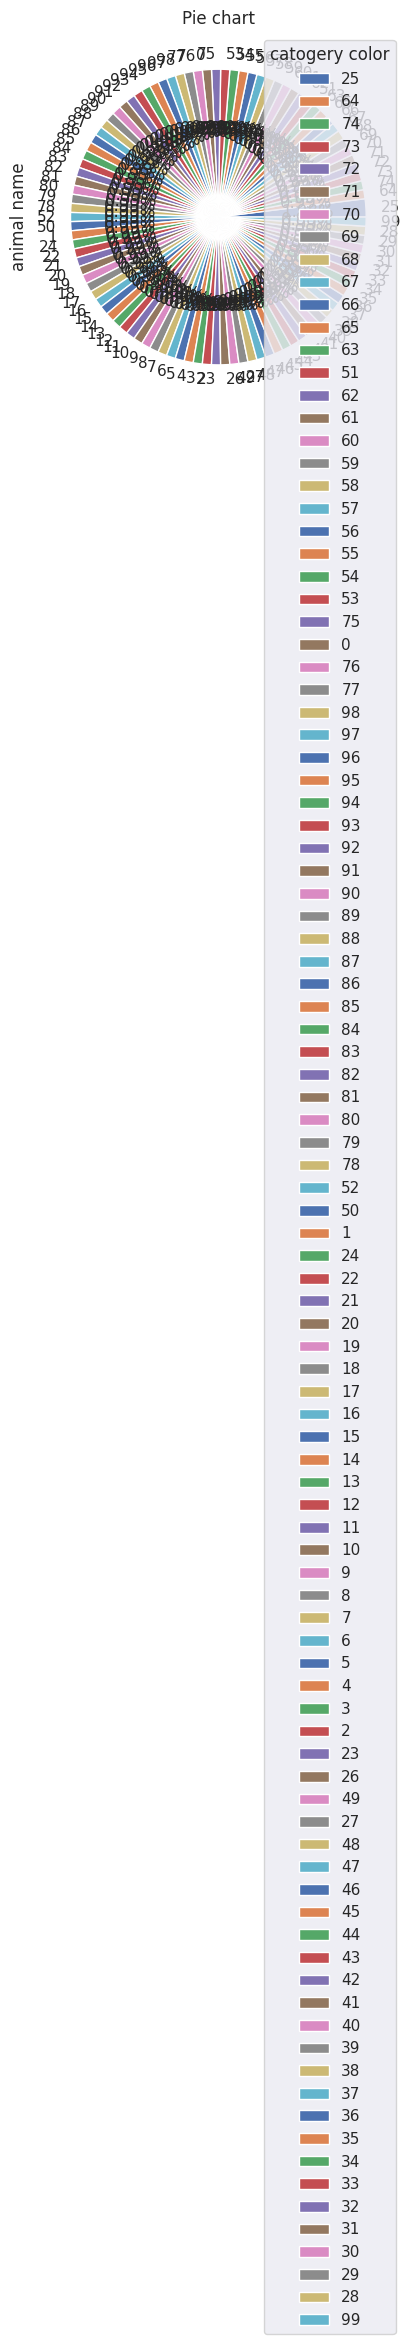

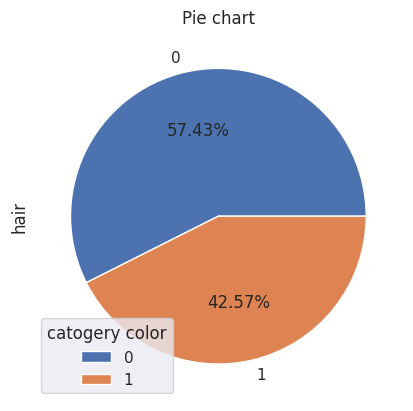

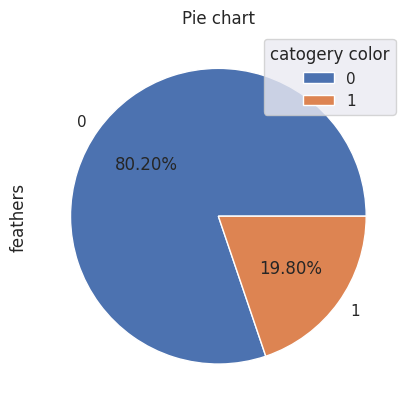

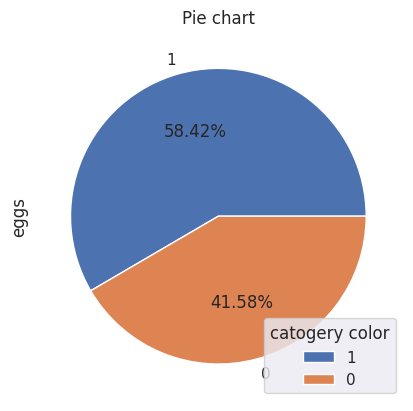

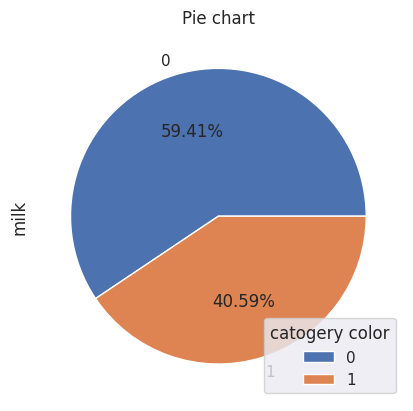

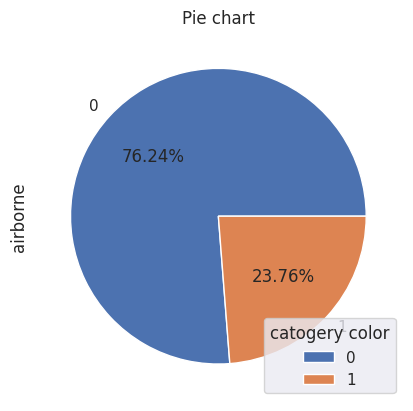

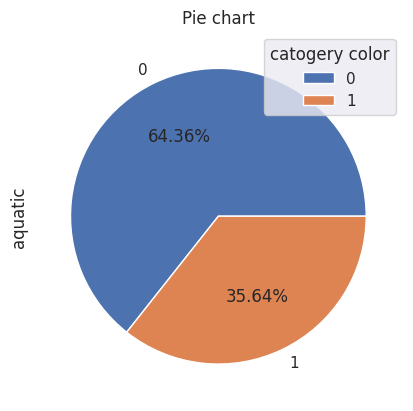

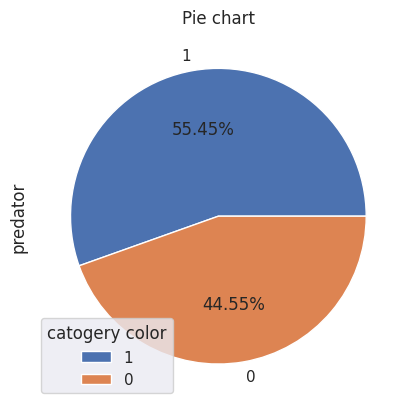

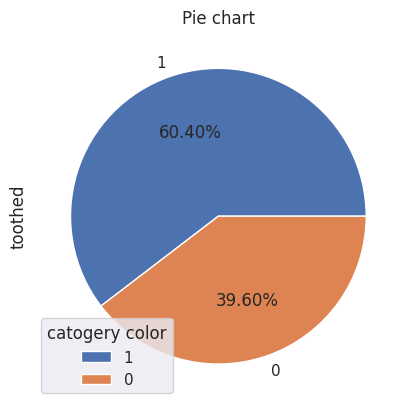

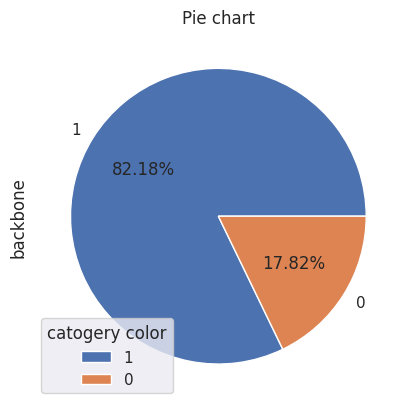

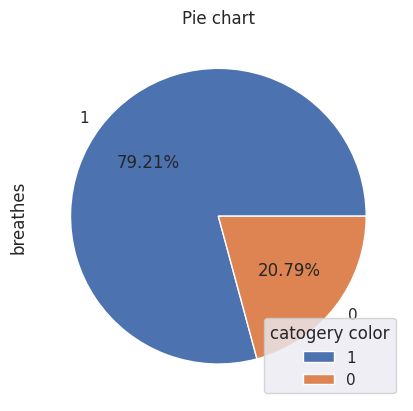

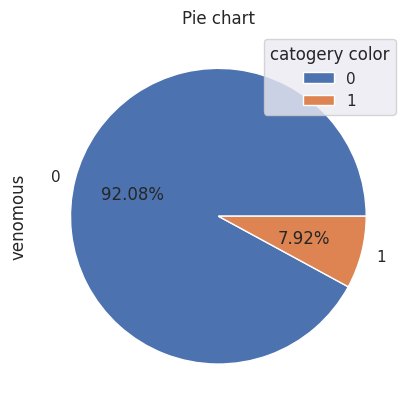

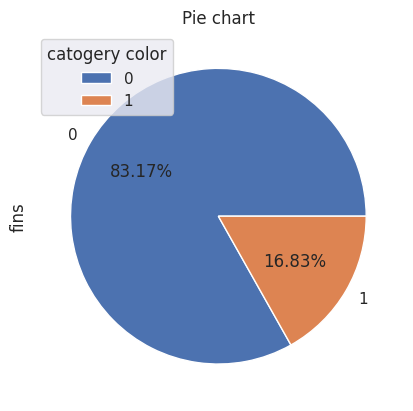

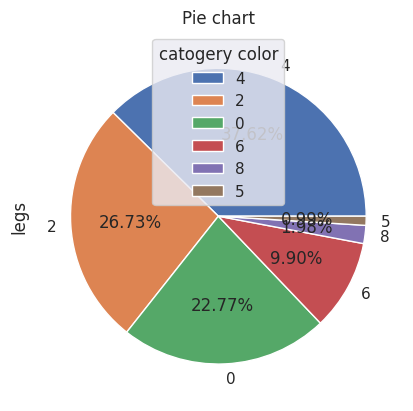

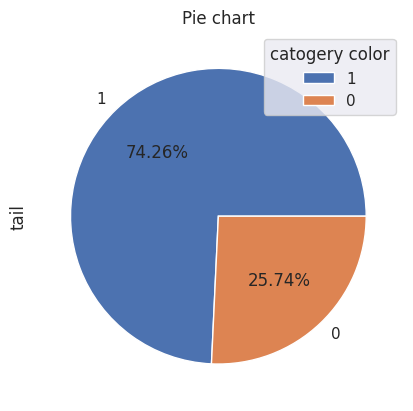

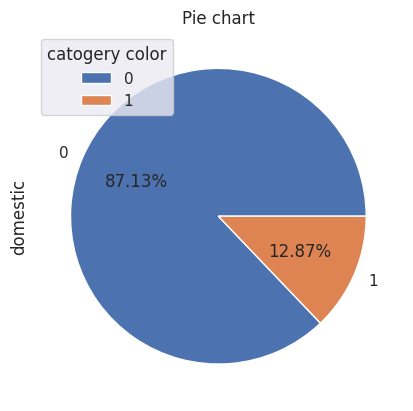

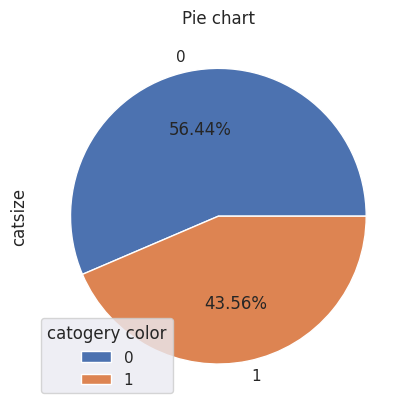

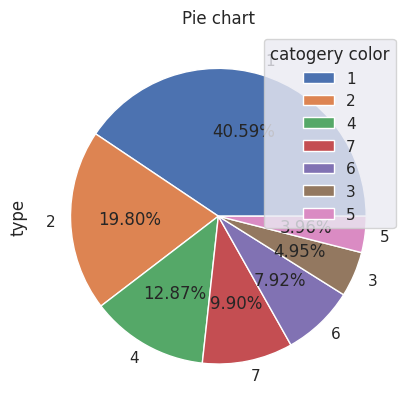

In [35]:
##-------------------Univariate analysis-----------------------------------------------
#constructing pie-chart for each variable value counts

import matplotlib.pyplot as plt
for column in df.select_dtypes(include=["int64"]):
  df[column].value_counts().plot(kind='pie',autopct='%1.2f%%')
  plt.title("Pie chart")
  plt.legend(title="catogery color") #gives which color is for which one
  plt.show()


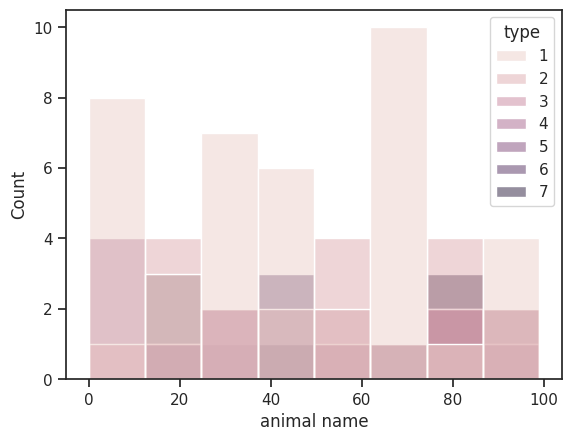

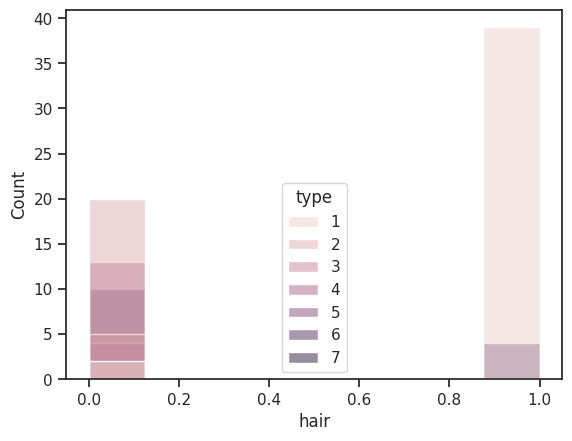

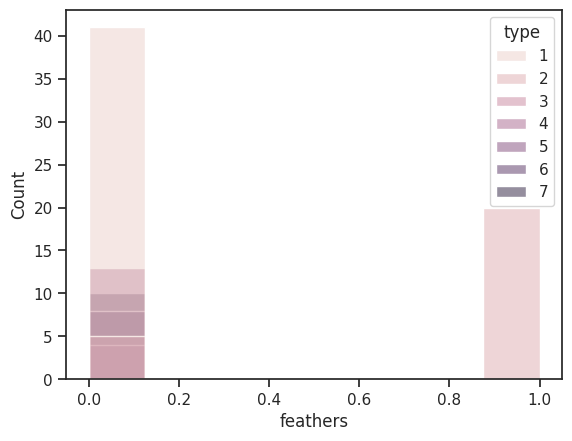

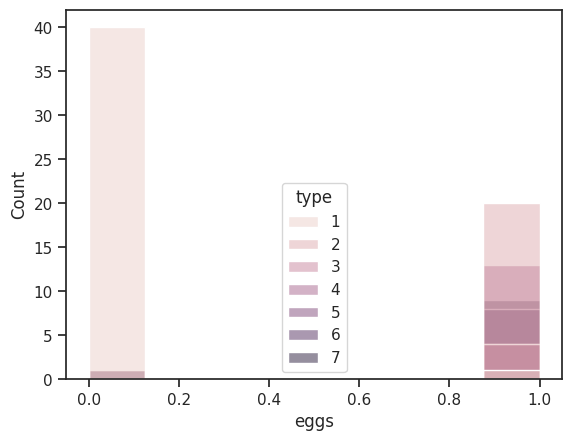

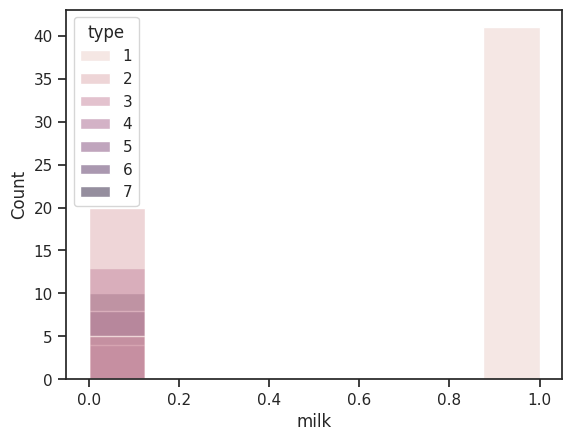

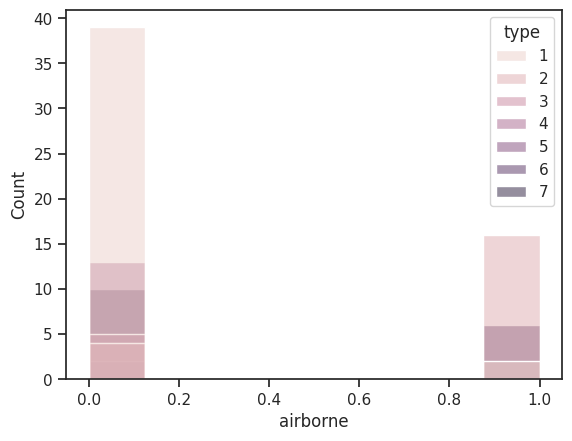

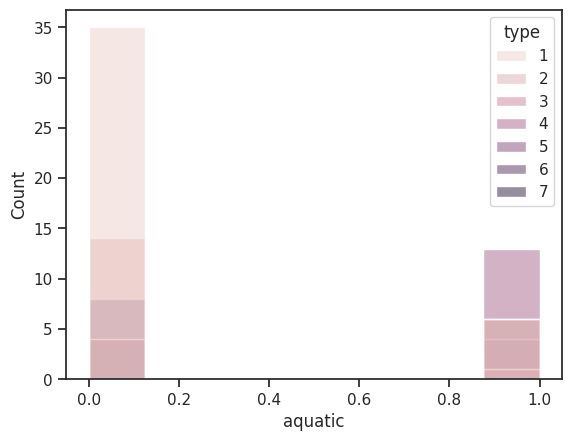

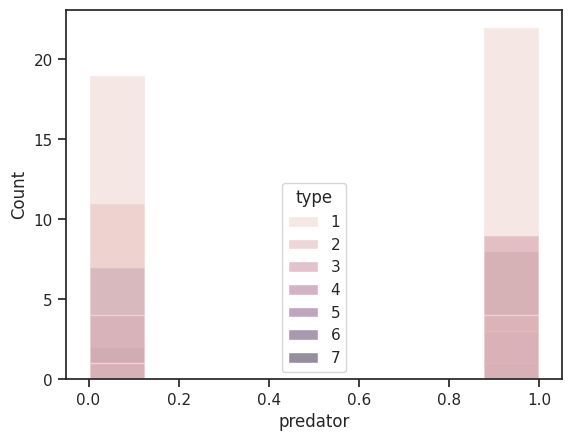

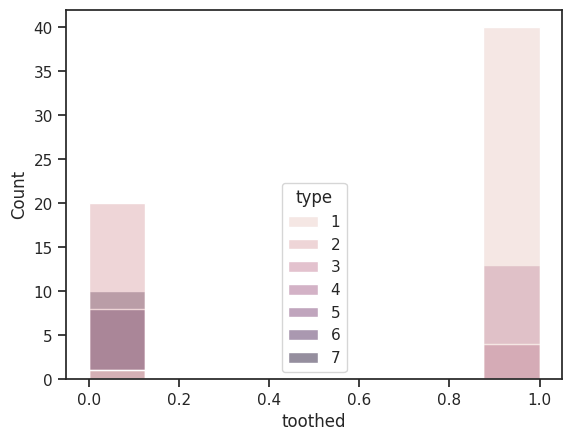

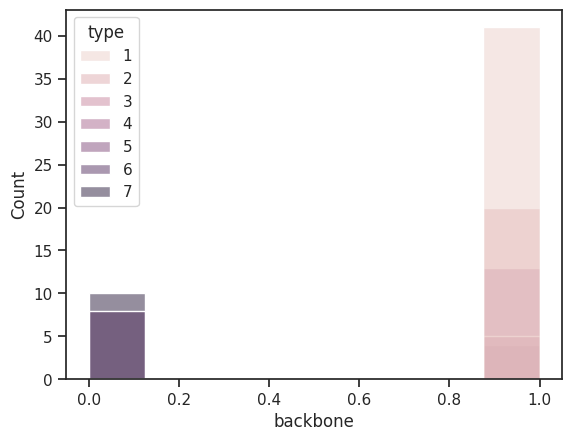

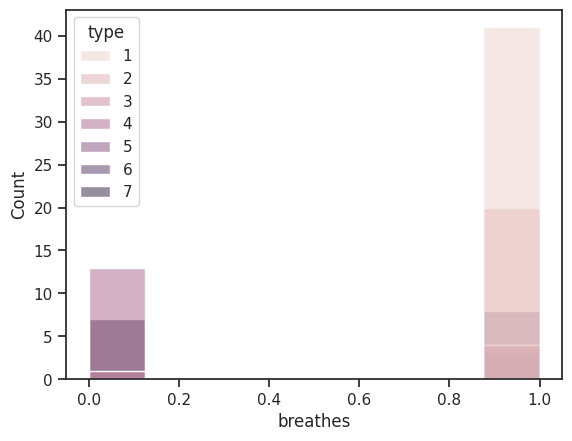

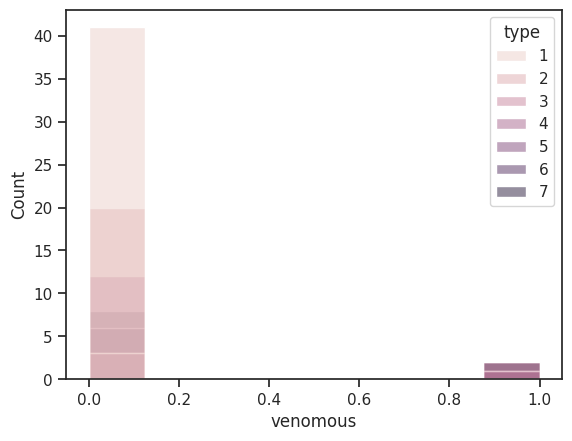

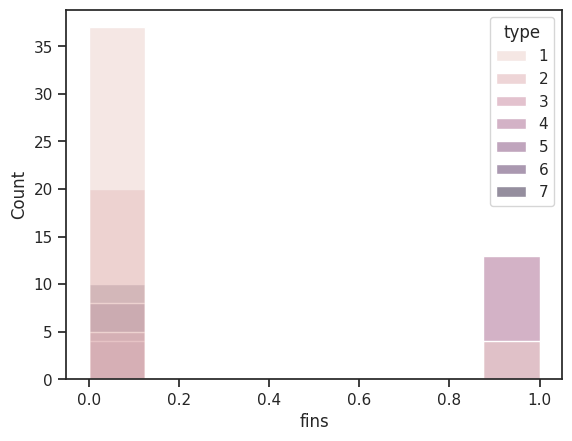

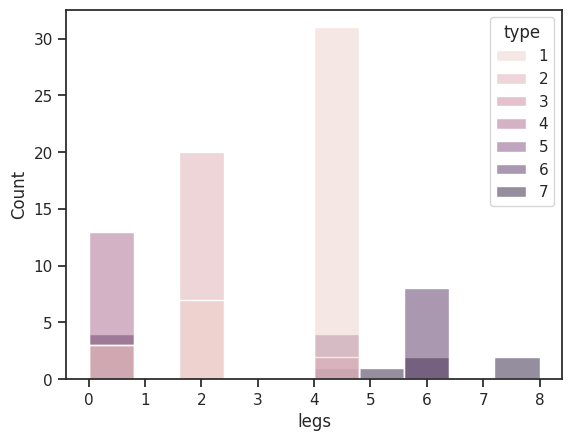

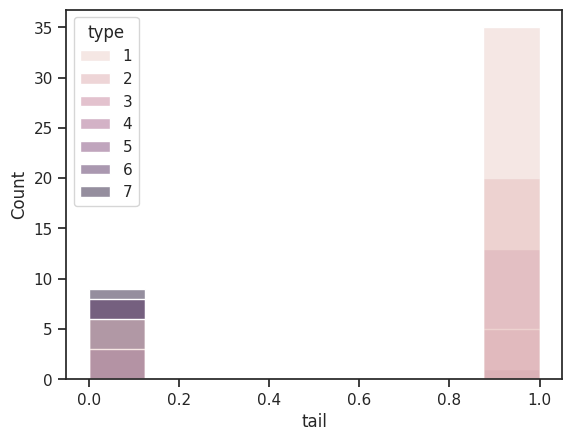

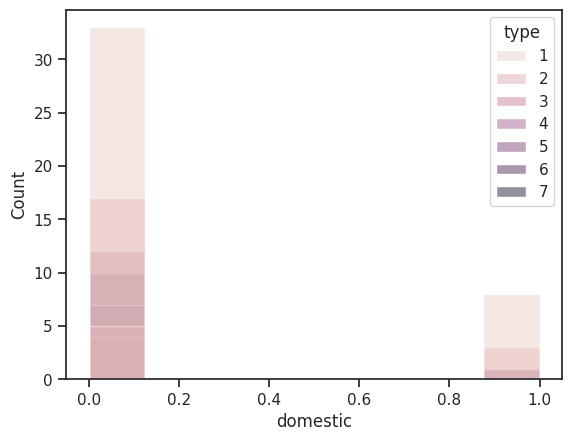

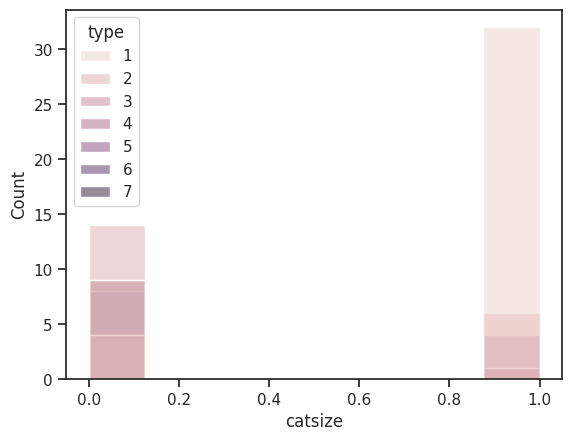

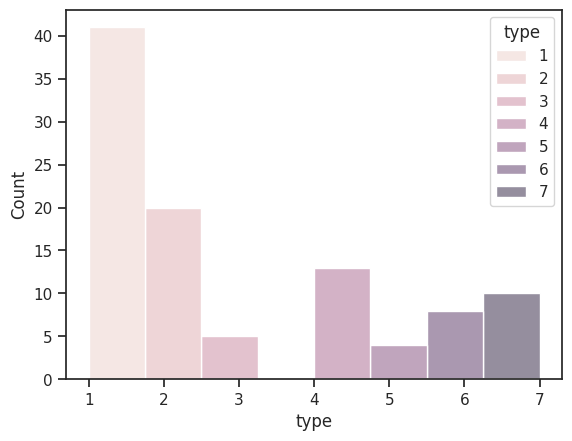

In [17]:
#---------------Bivariate analysis-----------------------------------------------------
#constructiing the histogram plot for all X variables based on type
import seaborn as sns
#Histogram for each feature with type
for column in df.select_dtypes(include=["int64"]):
    sns.histplot(x=df[column], hue=df['type'])
    plt.show()

In [20]:
#Bar graph for every x- variable

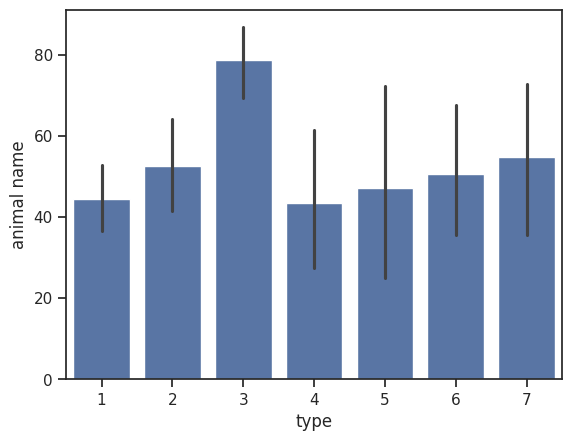

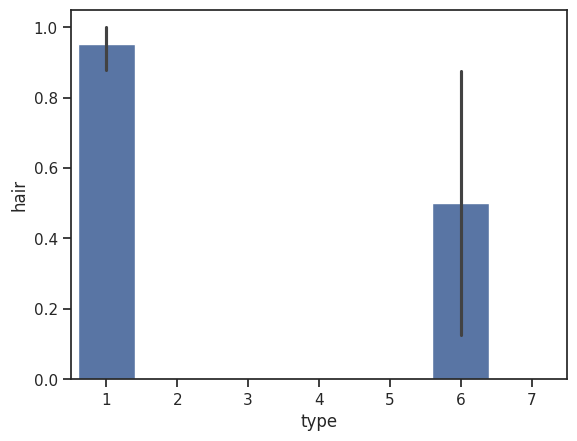

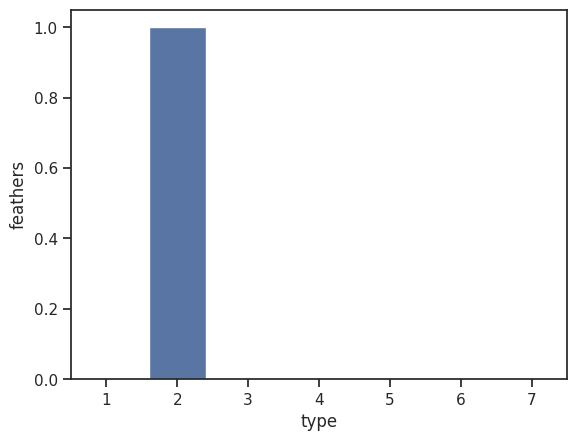

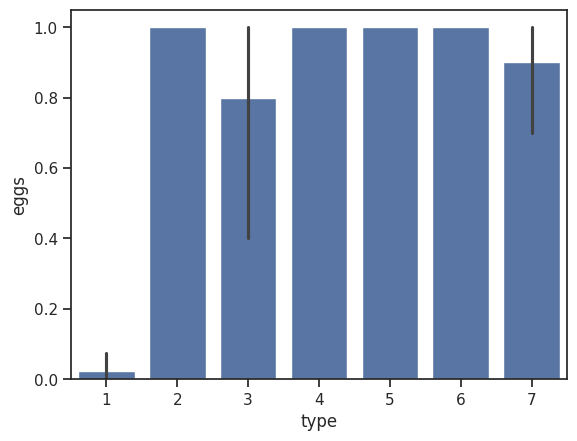

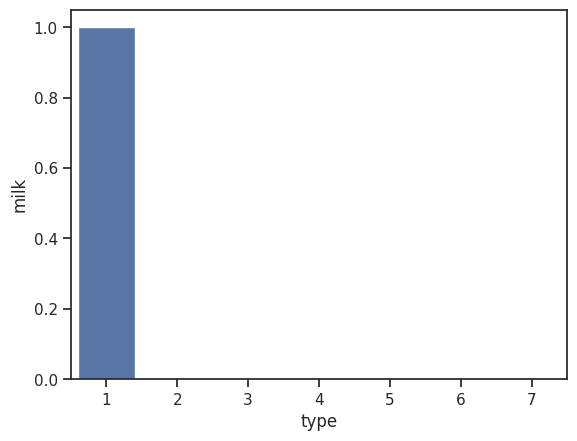

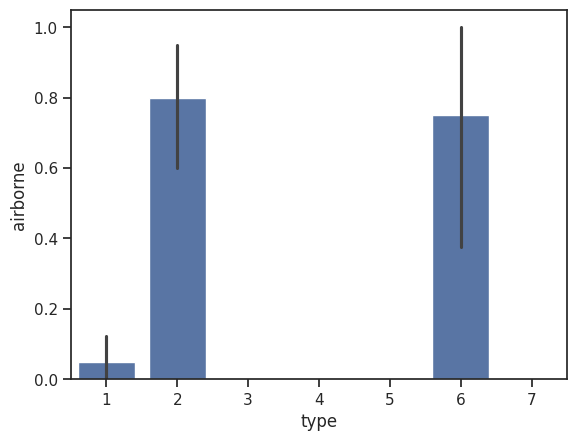

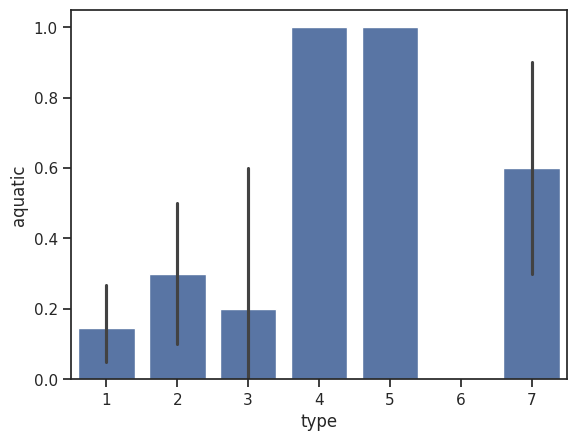

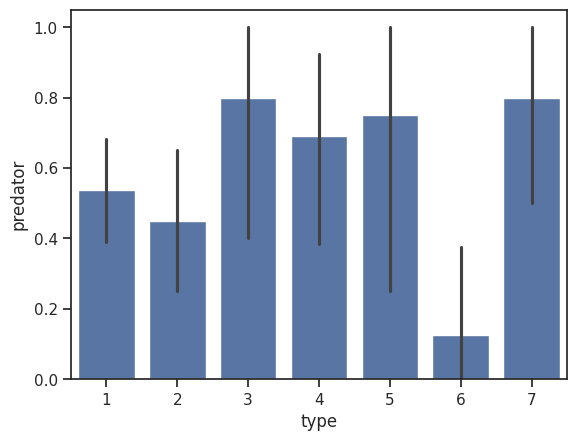

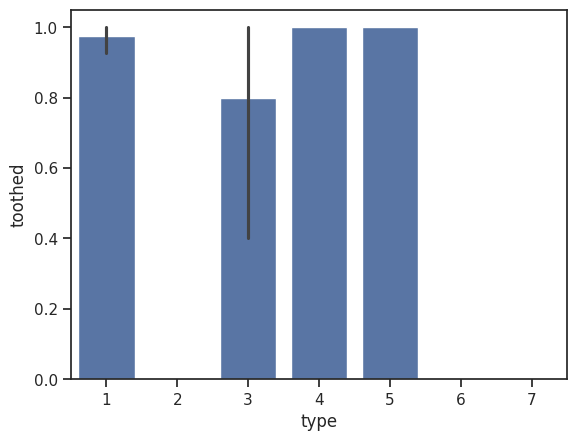

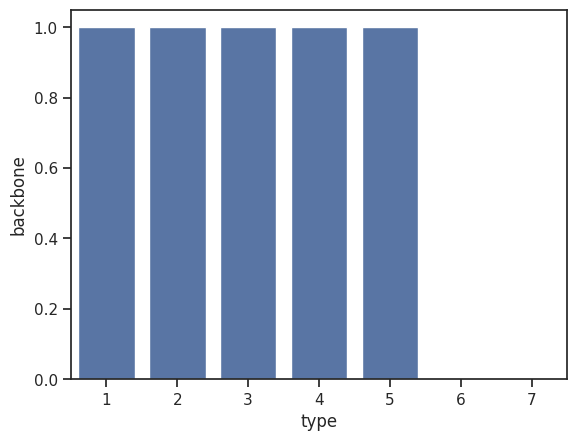

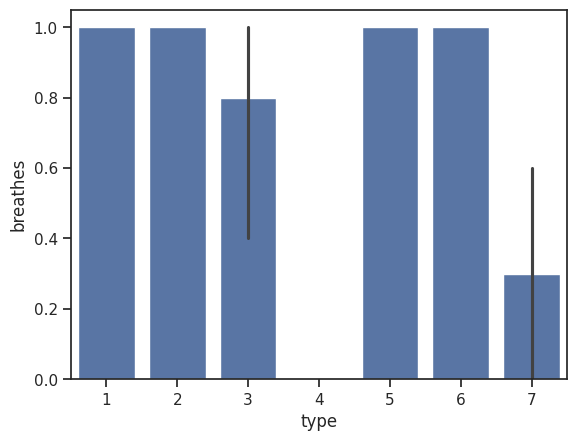

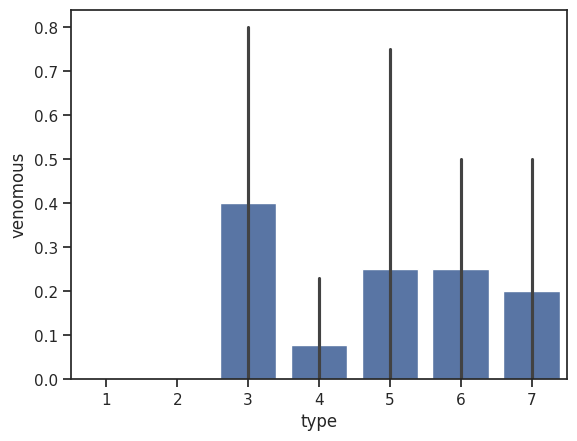

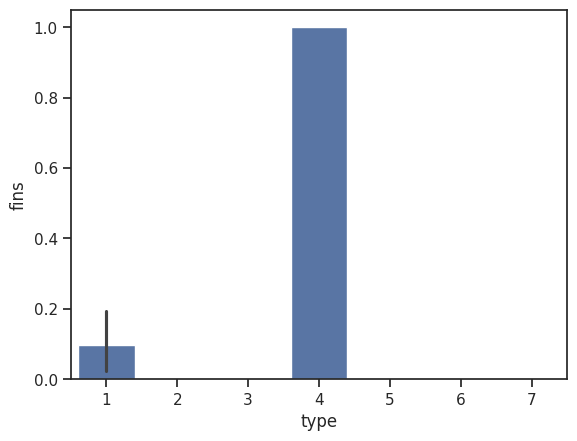

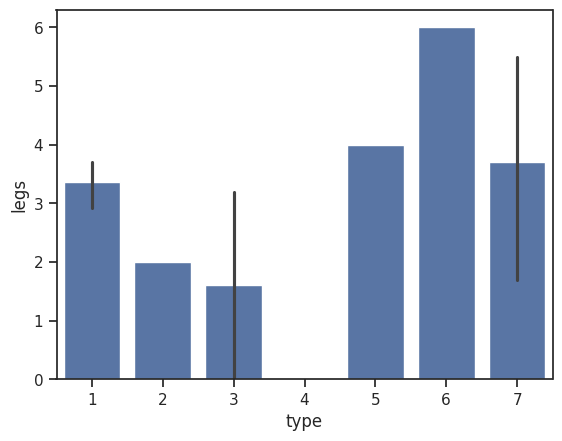

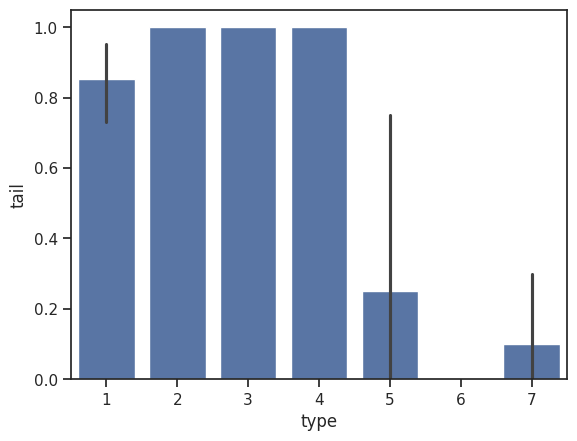

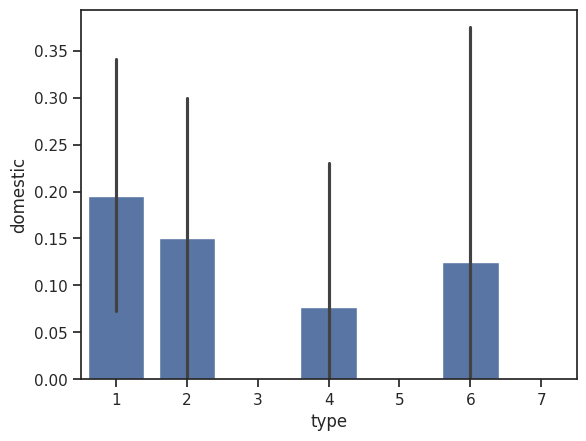

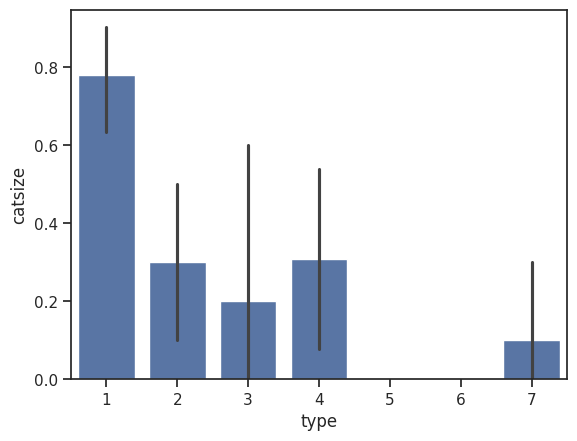

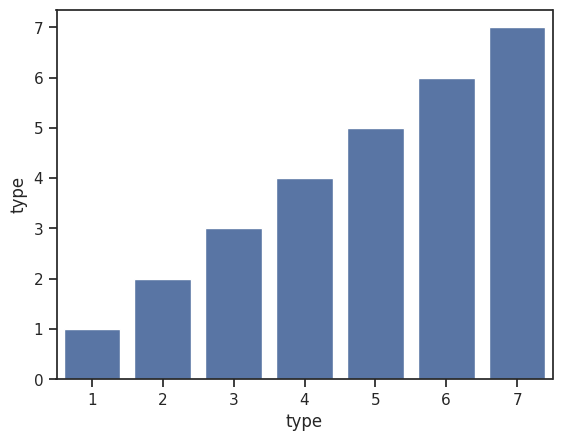

In [19]:
##Bar graph for every x- variable with type

import matplotlib.pyplot as plt
for column in df.select_dtypes(include=["int64"]):
  sns.barplot(x=df['type'], y=df[column])
  plt.show()


In [36]:
#Scatter plot for each pair of features
for i, column1 in enumerate(df.select_dtypes(include=["int64"])):
    for column2 in df.select_dtypes(include=["int64"])[i+1:]:
        sns.scatterplot(x=df[column1], y=df[column2], hue=df['type'])
        plt.show()


Output hidden; open in https://colab.research.google.com to view.

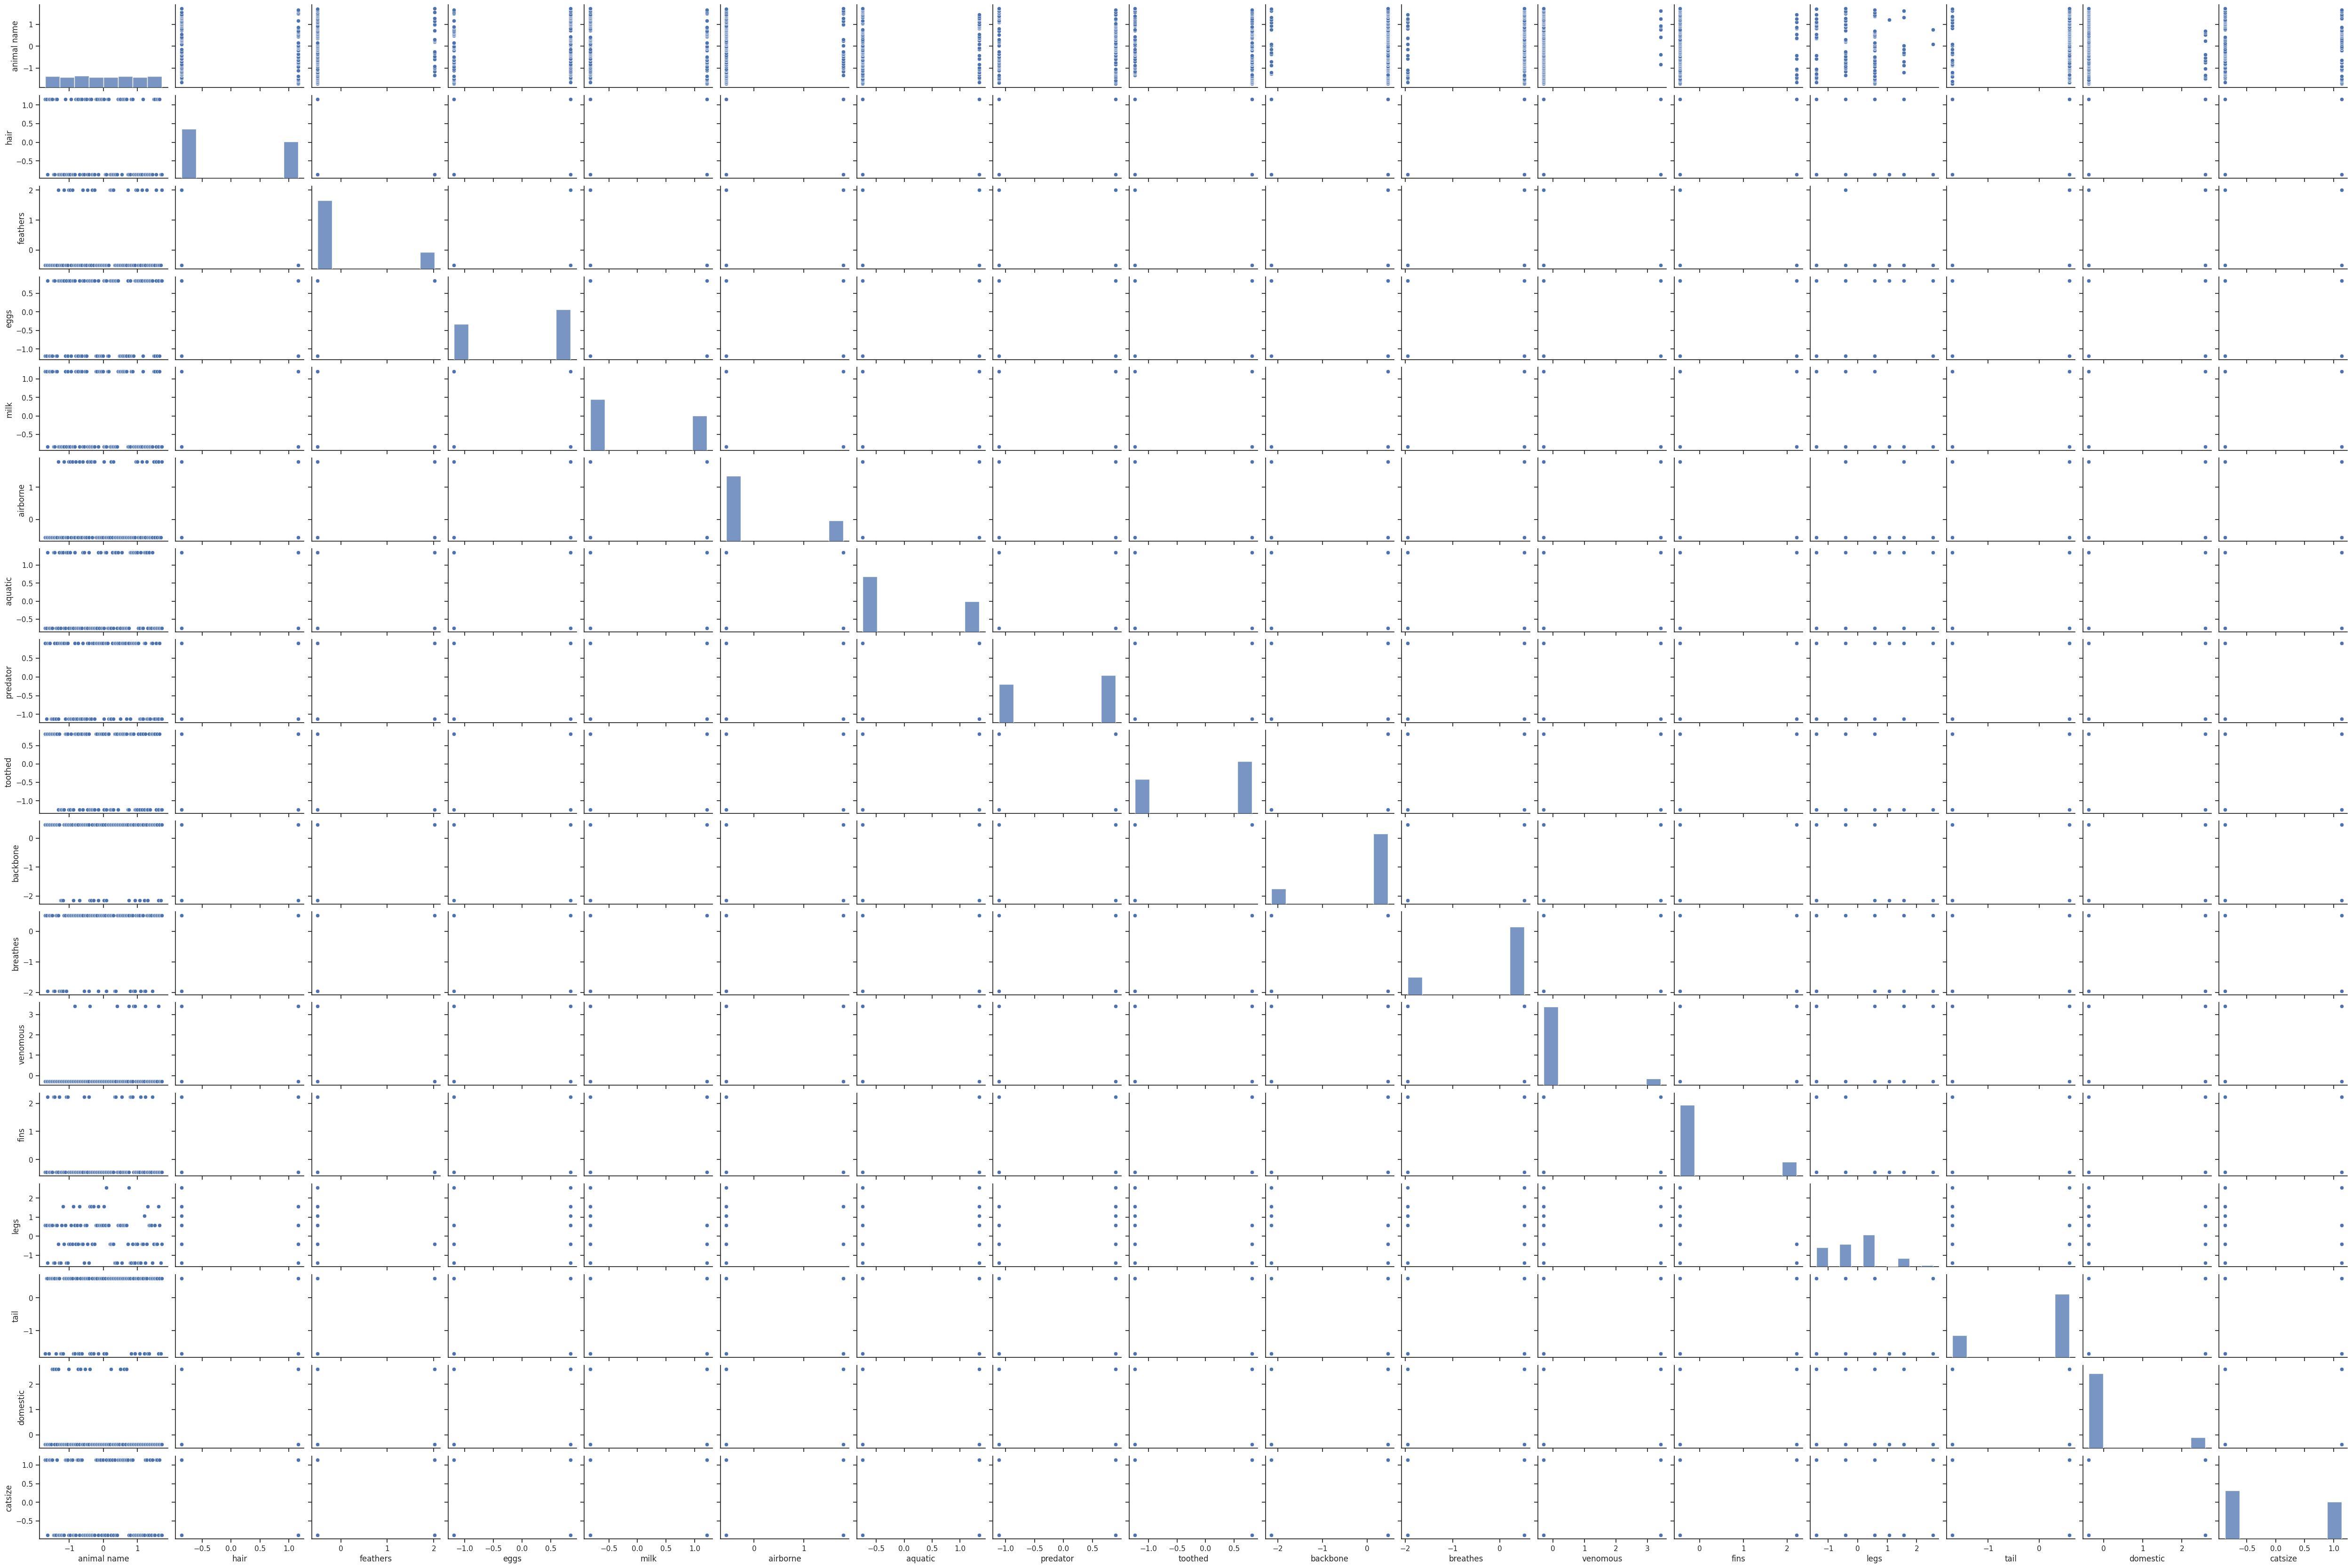

In [37]:
#constructiing the scatter plot for all X variables at a time
import seaborn as sns
sns.set(style="ticks")
sns.pairplot(SS_x,height=2,aspect=1.5)

In [ ]:
'''--------Reference codes-----------------------

#constructiing the scatter plot for all X variables
import seaborn as sns
sns.set(style="ticks")
sns.pairplot(SS_x,height=2,aspect=1.5)

#Visualizing the data
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df, hue = 'type')
plt.show()

#Correlation matrix
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.show()

#Boxplot for each feature
for column in df.select_dtypes(include=["int64"]):
    sns.boxplot(x=df['type'], y=df[column])
    plt.show()

#Histogram for each feature
for column in df.select_dtypes(include=["int64"]):
    sns.histplot(x=df[column], hue=df['type'])
    plt.show()

#Scatter plot for each pair of features
for i, column1 in enumerate(df.select_dtypes(include=["int64"])):
    for column2 in df.select_dtypes(include=["int64"])[i+1:]:
        sns.scatterplot(x=df[column1], y=df[column2], hue=df['type'])
        plt.show()
'''